In [36]:
#4.7 示例：随机漫步
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


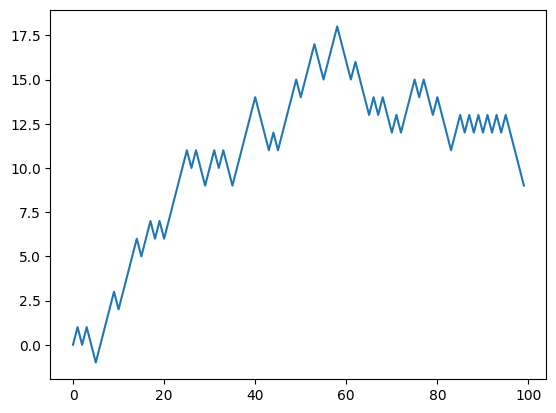

In [17]:
import matplotlib.pyplot as plt
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

#以上这一段代码为书中的代码，在if语句的地方用了三元运算符，暂且不理解语句的意思
#整段代码的功能为模拟走路，随机的前进1步或者后退1步，初始位置是0；
#一共走1000步，图示的为100步后的情况。

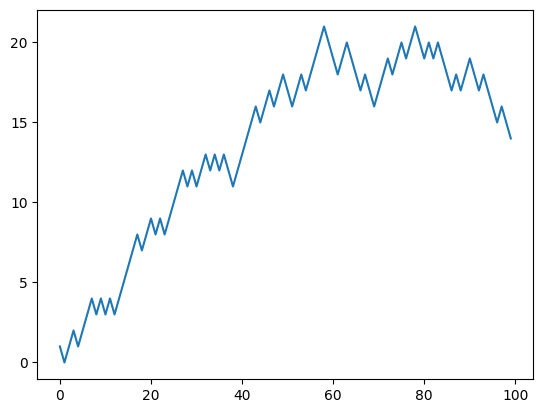

In [23]:
import numpy as np
import matplotlib.pyplot as plt

nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws > 0,1,-1)
walk = steps.cumsum()

plt.plot(walk[0:100])

#这是书上的代码，跟python内置的random模块不同；
#首先定义了总步数nsteps为1000；
#其次通过np.random.randint函数，生成0到2区间内的随机整数，即为0或者1，数量为1000个；
#再用np.where函数，这是以恶个条件选择函数，进行条件判断，是否大于0；
#如果大于0，则赋值为1；否则则赋值为-1；
#最后一步是使用numpy中的累计函数cumsum,将刚才的1000步的steps进行累加，最后图示

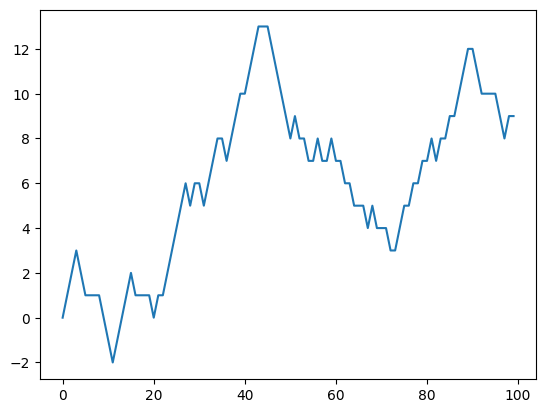

In [18]:
import matplotlib.pyplot as plt
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = random.randint(-1,1)
    position += step
    walk.append(position)

plt.plot(walk[:100])

#以上这一段代码主要是重写了三元运算符；
#但是造成了一个错误，将random.randint(0,1)改成了random.randint(-1,1)，然后直接累加到position这个变量上去；
#但是可以根据图像可知，当random.randint(-1,1)，为生成-1到1之间的整数，那么多了一个0，也就是原地踏步的情况；
#如果需要简化书中的代码，应该用random.choice()函数


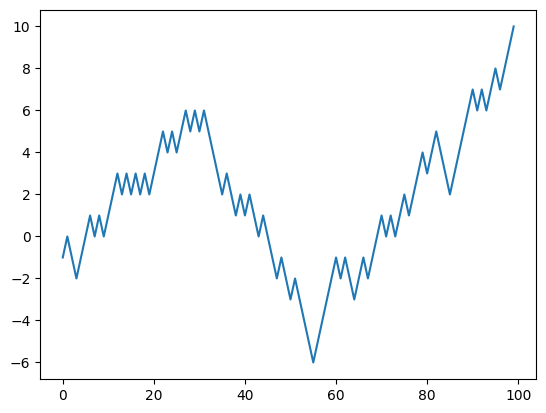

In [27]:
import numpy as np


steps = np.random.choice([-1,1],size=1000)
walk = steps.cumsum()

plt.plot(walk[0:100])

#以上这一段代码是对书上的代码进行的简化，省略了条件判断的中间步骤；
#choice函数在给定的数组（即-1和1）之间，随机选择1000次


In [ ]:
#一次性模拟多次随机漫步

In [107]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(draws > 0,1,-1)

walks = steps.cumsum(1)
print(walks)
print(walks.max(),walks.min())

#这一段代码首先表示了进行5000次随机漫步，每次走1000步；
#随后建立一个5000×1000的数组；
#再通过where函数，对前进或者后退的数值进行定义
#求每一行的累计和，累计和是每行的最后一个值。同时也代表了每一次的随机漫步的最后位置，一共有5000个这样的值；
#最后求这5000个值里最大值和最小值，即两个方向走的最远的值

[[  1   0   1 ...  30  29  28]
 [ -1  -2  -3 ...   6   5   4]
 [ -1  -2  -1 ... -42 -43 -44]
 ...
 [  1   2   1 ...  14  13  14]
 [ -1  -2  -3 ... -28 -29 -28]
 [ -1   0  -1 ...   4   3   2]]
111 -128


In [112]:
nwalks = 5000
nsteps = 1000
steps = np.random.choice([1,-1],size = (nwalks,nsteps))
walks = steps.cumsum(1)

print(walks)
print(walks.min(),walks.max())

#以上这一段代码也是使用choice函数对书上代码进行的简化，大致思路一致。

[[  1   2   1 ...  28  29  30]
 [  1   2   3 ... -24 -23 -22]
 [ -1   0   1 ...  42  43  44]
 ...
 [ -1   0  -1 ...  42  41  42]
 [ -1  -2  -1 ...  12  11  10]
 [ -1  -2  -3 ... -40 -41 -42]]
-122 117


In [116]:
hit30 = (np.abs(walks) >= 30).any(1)
print(hit30)
print(hit30.sum())

#这一段程序设定了一个阈值，为30，并且判断每一列数字是否存在绝对值大于30，用一个布尔数组进行回答，并且求和大于30的所有值

[ True  True  True ...  True False  True]
3446


In [118]:
crossing_time = (np.abs(walks[hit30]) >= 30).argmax(1)
print(crossing_time.mean())

#本段代码意为求在绝对值达到30的随机漫步中，达到这个数值的步数
#也就是说，计算每次成功达到绝对位置30的随机漫步中，是第几步到达的这个位置，以及他们的平均步数。


499.6436448055717
